## Introducción

En este proyecto abordaremos la evaluación de los videojuegos lanzados en 2016 para identificar qué los hace exitosos. A partir de los registros de ventas, buscaremos patrones que delineen el éxito de un título.

Iniciaremos por inspeccionar y adecuar los datos según sea necesario. Es sabido que no todos los conjuntos de datos son perfectos; por lo tanto, verificaremos la integridad, posibles entradas duplicadas y la presencia de datos faltantes. En caso de hallar vacíos en la información, emplearemos técnicas estadísticas para imputarlos adecuadamente. Y, si detectamos duplicados por error, decidiremos si es pertinente su eliminación.

Una vez establecido un DataFrame sólido y fiable, extraeremos patrones esenciales para orientar estratégicamente las campañas del año venidero.

Para llevar a cabo este análisis, trabajaremos en la plataforma Jupyter Notebook, apoyándonos en diversas librerías de Python especializadas.

## Hipótesis

1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## Carga de datos e información

### Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import pearsonr

### Datos

In [2]:
# Cargar el archivo de datos en un DataFrame
df = pd.read_csv("/datasets/games.csv")

### Introducción a los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**El dataset contiene los siguientes datos:**

- **Name**
- **Platform**
- **Year_of_Release**
- **Genre**
- **NA_sales**
- **EU_sales**
- **JP_sales**
- **Other_sales**
- **Critic_Score**
- **User_Score**
- **Clasificación**

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**La vista previa muestra que:**

- **las columnas Name, Year_of_Release, Genre, Critic_Score, User_Score y Rating tienen valores ausentes**
- **la columna Year_of_Release es tipo float y deberia ser int ya que no hay decimales en los años**
- **la columna User_Score es tipo object y deberia ser float ya que esta columna representa calificaciones númericas**

## Preprocesamiento de datos

### Corrección nombres de columnas

In [5]:
# Cambiar los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

### Buscar y corregir datos duplicados

**Se analizan las columnas name, platform y genre en busca de valores duplicados.**

In [6]:
# Se buscan valores duplicados en la columna name
df['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [7]:
# Se buscan valores duplicados en la columna platform
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [10]:
# Se buscan valores duplicados en la columna genre
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [11]:
# Se buscan valores duplicados en la columna rating
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

**No se encontraron valores extraños ni duplicados.**

### Corrección de valores ausentes

**Se investigan las columnas pues tienen valores ausentes:**
- **name**
- **year_of_release**
- **genre**
- **critic_score**
- **user_Score**
- **rating.**

In [12]:
# Investigar valores ausentes de columna name
df.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Los valores ausentes en la columna name coinciden con los de la columna genre.**

In [13]:
print('Porcentaje de valores ausentes en la columna "name" y "genre":', round(2/total_rows*100,3),'%')

Porcentaje de valores ausentes en la columna "name" y "genre": 0.012 %


In [14]:
# Eliminar filas de valores ausentes en las columnas name y genre
df = df.query('name.isna() == False')

**Los valores ausentes en las columnas name y genre son mínimos y tienen información incompleta en las demás columnas por lo que se eliminan.**

## Valores Ausentes

### Valores ausentes en columna year_of_release 

In [15]:
# Investigar valores ausentes de columna year_of_release
df.query('year_of_release.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
print('Porcentaje de valores ausentes en la columna "year_of_release":', round(269/total_rows*100,2),'%')

Porcentaje de valores ausentes en la columna "year_of_release": 1.61 %


In [17]:
# Eliminar filas de valores ausentes en la columna year_of_release
df = df.query('year_of_release.isna() == False')

**En algunas filas, el nombre del juego viene acompañado del año en que fue lanzado. A pesar de que hay pocas filas que no tienen este dato, no impactan significativamente el análisis y, por lo tanto, pueden ser eliminadas.**

### Valores ausentes en columna critic_score.

In [18]:
# Investigar valores ausentes de columna critic_score
df.query('critic_score.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [20]:
print('Porcentaje de valores ausentes en la columna "critic_score":', round(8461/total_rows*100,2),'%')

Porcentaje de valores ausentes en la columna "critic_score": 50.62 %


In [21]:
# Asignar el valor NAN a los valores ausentes para continuar el análisis sin errores por tipo de dato
df['critic_score'] = df['critic_score'].fillna(np.nan)

**Más de la mitad de los datos en la columna "critic_score" presentan valores ausentes. Dada esta situación, no es viable eliminar estas filas ni tampoco asignarles un valor sin correr el riesgo de sesgar el análisis. Por lo tanto, procederemos asumiendo la ausencia de información en dicha columna.**

### Valores ausentes en columna user_score

In [22]:
# Investigar valores ausentes de columna user_score
df.query('user_score.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
print('Porcentaje de valores ausentes en la columna "user_score":', round(6605/total_rows*100,2),'%')

Porcentaje de valores ausentes en la columna "user_score": 39.52 %


**Un porcentaje significativo de las filas presenta valores faltantes en la columna "user_score". Debido a ello, no es aconsejable eliminarlas ni asignar un valor arbitrario, ya que podría comprometer la integridad del análisis. Por ende, se continua asumiendo falta de datos en esta columna.**

In [24]:
# Asignar el valor NAN a los valores ausentes para continuar el análisis sin errores por tipo de dato
df['user_score'] = df['user_score'].fillna(np.nan)

### Valores ausentes en columna rating

In [25]:
# Se buscan valores duplicados en la columna rating
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

**La columna rating cuenta con los siquientes valores:**

- **E (todos)**
- **EC (mayores de 3 años) dejó de usarse en 2018 y se reemplazó con E**
- **E10+ (mayores de 10 años)**
- **K-A (mayores de 10 años) dejó de usarse en 1998 y se reemplazó con E10+**
- **T (mayores de 13 años)**
- **M (mayores de 17 años)**
- **A0 (sólo para adultos de 18 años en adelante)**
- **RP (pendiente de clasificar)**

In [26]:
# Investigar valores ausentes de columna rating
df.query('rating.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [27]:
# Investigar valores ausentes de columna rating
df.query('rating.isna() == True and year_of_release < 1994')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13571,Sonic the Hedgehog 2 (8-bit),GG,1992.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15692,Empire Deluxe,PC,1992.0,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


**La ESRB se fundo en 1994, por lo que es comprensible que haya múltiples juegos lanzados en años anteriores sin esta clasificación.**

In [28]:
print('Porcentaje de valores ausentes en la columna "rating":', round(6676/total_rows*100,2),'%')

Porcentaje de valores ausentes en la columna "rating": 39.94 %


**Las filas con valores ausentes en la columna rating representan un porcentaje alto por lo que no se pueden eliminar. A continuación se busca un valor representativo para ellas.**

In [29]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

**Se establecen los valores ausentes de la columna rating como RP, es decir, pendiente de clasificar. (Rating Pending)**

In [30]:
# Asignar el valor unknown a los valores ausentes
df['rating'] = df['rating'].fillna("RP")

## Corregir tipos de datos

In [31]:
# Cambiar tipo de dato
df['year_of_release'] = df['year_of_release'].astype('int')

In [33]:
# Investigar tipo de dato de columna user_score
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


**El valor tbd (to be defined) en la columna user_score probablemente se deba a calificaciones de usuarios insuficientes, por lo que este valor se mantiene así y la columna permanece con el tipo de dato de objeto.**

## Enriquecer datos

**Se crea una columna con las ventas totales de cada videojuego.**

In [34]:
# Crear columna de ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

**Se crea una columna con las ventas totales promedio por año.**

In [35]:
df['sales_per_year'] = round( df['total_sales'] /  (2017-df['year_of_release'])  ,2)

## Verificar cambios

In [36]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,7.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24,1.26
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,3.95
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,4.10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38,1.49


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
 12  sales_per_year   16444 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


## Analizar datos

### Ventas por año de lanzamiento

**Se observan los juegos agrupados por año de lanzamiento para ver si este factor es significativo.**

In [38]:
# Juegos lanzados por año
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

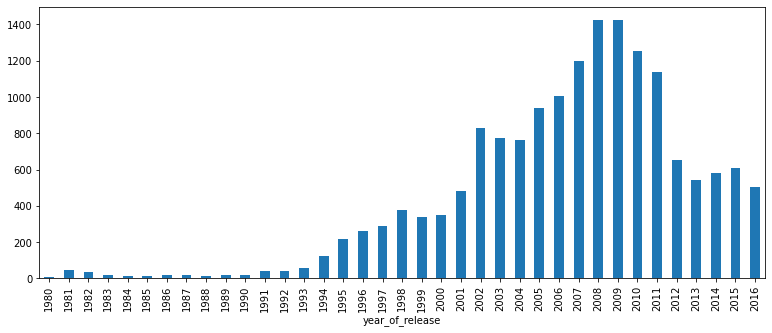

In [39]:
# Juegos lanzados por año
df.groupby('year_of_release')['name'].count().plot(kind='bar',figsize=(13,5))
plt.show()

**Los años con más juegos lanzados fueron los años entre 2005 y 2011. Incluso, cada uno de ellos duplica la cantidad de juegos lanzados en el 2016.**

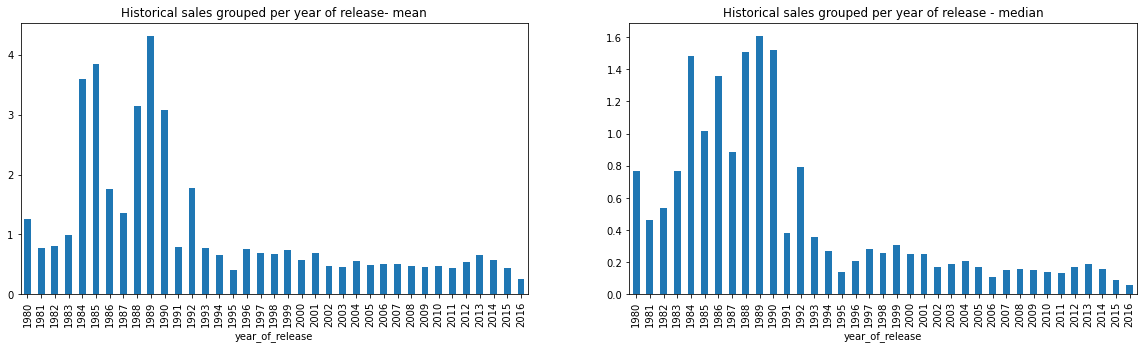

In [40]:
# Ingresos históricos de juegos por año de lanzamiento
plt.subplots(figsize=(20, 5)) 
df.groupby('year_of_release')['total_sales'].mean().plot(kind='bar', ax= plt.subplot(1,2,1))
plt.title('Historical sales grouped per year of release- mean')
df.groupby('year_of_release')['total_sales'].median().plot(kind='bar', ax= plt.subplot(1,2,2))
plt.title('Historical sales grouped per year of release - median')
plt.show()

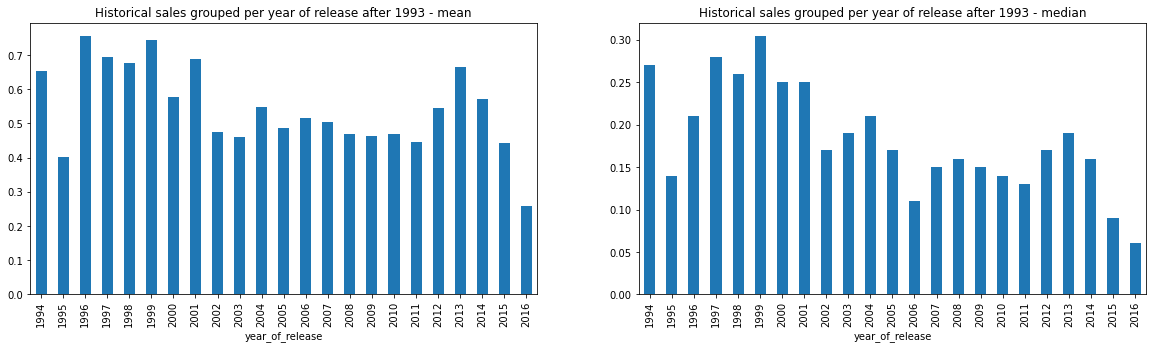

In [41]:
# Ingresos históricos de juegos por año de lanzamiento después de 1993
plt.subplots(figsize=(20, 5)) 
df.query('year_of_release>1993').groupby('year_of_release')['total_sales'].mean().plot(kind='bar', ax= plt.subplot(1,2,1))
plt.title('Historical sales grouped per year of release after 1993 - mean')
df.query('year_of_release>1993').groupby('year_of_release')['total_sales'].median().plot(kind='bar', ax= plt.subplot(1,2,2))
plt.title('Historical sales grouped per year of release after 1993 - median')
plt.show()

In [42]:
df.query('2005<= year_of_release <=2011').groupby('year_of_release')['total_sales'].mean()

year_of_release
2005    0.487561
2006    0.514622
2007    0.505221
2008    0.470568
2009    0.462006
2010    0.470223
2011    0.446813
Name: total_sales, dtype: float64

**Antes de 1994, se lanzaron pocos juegos anualmente, no superando los 60. Debido a esta limitada oferta, los ingresos por juego eran más altos. Sin embargo, a partir de 1994, la cantidad de juegos lanzados empezó a aumentar, lo que llevó a una disminución en los ingresos por juego, ya que el gasto de los consumidores se distribuyó entre una mayor variedad de títulos.**

**En términos de promedios, los juegos que debutaron después de 1994 generaron ingresos que fluctuaron entre 0.2 y 0.7 MDD. Esto contrasta con los títulos anteriores a ese año, que alcanzaban ingresos medios de hasta 4 MDD. Es notable mencionar que entre 2005 y 2011, período con el mayor número de lanzamientos, los ingresos promedio por año de lanzamiento variaron entre 0.44 y 0.51 MDD. Estas cifras aumentaron en los años posteriores, cuando la cantidad de juegos lanzados disminuyó.**

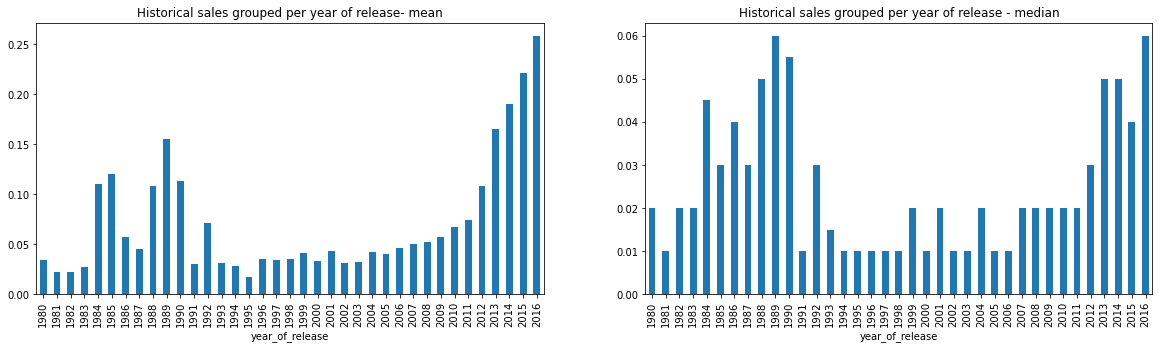

In [43]:
# Ingresos anuales de juegos por año de lanzamiento
plt.subplots(figsize=(20, 5)) 
df.groupby('year_of_release')['sales_per_year'].mean().plot(kind='bar', ax= plt.subplot(1,2,1))
plt.title('Historical sales grouped per year of release- mean')
df.groupby('year_of_release')['sales_per_year'].median().plot(kind='bar', ax= plt.subplot(1,2,2))
plt.title('Historical sales grouped per year of release - median')
plt.show()

In [44]:
# Mediana del año 1989 y 2016
df.query('year_of_release ==1989 or  year_of_release == 2016').groupby('year_of_release')['sales_per_year'].median()

year_of_release
1989    0.06
2016    0.06
Name: sales_per_year, dtype: float64

In [45]:
print('Historical sales per year of release')
df.query('year_of_release ==1989 or  year_of_release == 2016').groupby('year_of_release')['total_sales'].describe()

Historical sales per year of release


,count,mean,std,min,25%,50%,75%,max
year_of_release,,,,,,,,
1989,17.0,4.320588,7.895161,0.06,1.10,1.61,2.12,30.26
2016,502.0,0.258845,0.698041,0.01,0.02,0.06,0.20,7.60


**Cuando observamos las medianas de los ingresos anuales para juegos publicados antes de 1994, encontramos similitudes con aquellas de juegos lanzados después de 2011. Sorprendentemente, la mediana de 1989 coincide con la de 2016. Sin embargo, al profundizar en otros datos estadísticos, encontramos que de los 17 juegos estrenados en 1989, el ingreso más alto fue de 30.26 MDD. Por otro lado, en 2016, de un total de 502 juegos, el ingreso más alto alcanzó solo 7.6 MDD. Este contraste subraya cómo una mayor diversidad de juegos en el mercado conduce a una distribución de ingresos y, en consecuencia, a una disminución en los promedios por juego.**

### Ventas por plataforma

**Se observan como varían las ventas entre plataformas.**

In [46]:
# Número de ventas por plataforma
df.groupby('platform')['total_sales'].count().sort_values(ascending=False).head(10)

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
Name: total_sales, dtype: int64

In [47]:
# Ingresos de ventas totales por plataforma
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

**Las 5 plataformas con más juegos vendidos son:**

- **PS2**
- **DS**
- **PS3**
- **Wii**
- **X360**

**Mientras que las 5 plataformas con más ingresos históricos son:**

- **PS2**
- **X360**
- **PS3**
- **Wii**
- **DS**

**Las 5 primeras plataformas con estas características son las mismas pero en orden distinto por lo que se consideran plataformas potencialmente rentables.**

In [48]:
# Ganancias aproximadas por juego
(df.groupby('platform')['total_sales'].sum()/df.groupby('platform')['total_sales'].count()).sort_values(ascending=False).head(10)

platform
GB      2.622990
NES     2.561735
GEN     1.050000
SNES    0.836987
PS4     0.801378
X360    0.780227
2600    0.745517
PS3     0.713124
Wii     0.692986
N64     0.689905
Name: total_sales, dtype: float64

In [49]:
for plat in ['GB','NES','GEN','SNES','PS4']:
    print(plat,df.query('platform == @plat')['year_of_release'].min())

GB 1988
NES 1983
GEN 1990
SNES 1990
PS4 2013


**Las plataformas con más ingresos por juego son:**

- **GB**
- **NES**
- **GEN**
- **SNES**
- **PS4**

**Las primeras 4 no se encuentran en los dos primeros grupos y se estrenaron antes del 2000, por lo que únicamente se considera relevante la plataforma PS4.**

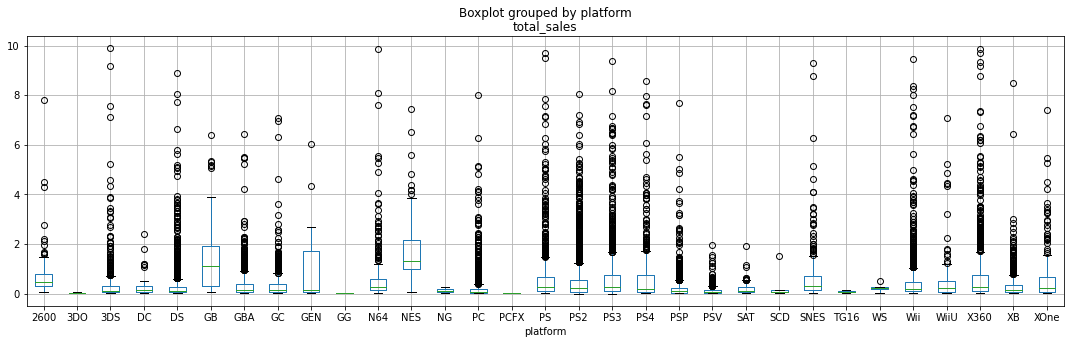

In [50]:
df.query('total_sales<10').boxplot(column='total_sales',by='platform',figsize=(18, 5))
plt.show()

**Se examina el promedio y la mediana de ventas anuales por plataforma.**

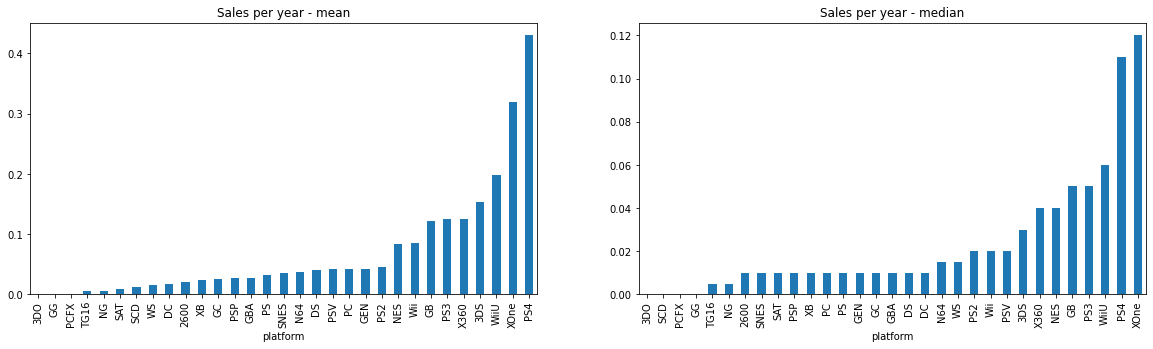

In [51]:
plt.subplots(figsize=(20, 5)) 
df.groupby('platform')['sales_per_year'].mean().sort_values().plot(kind='bar', ax= plt.subplot(1,2,1))
plt.title('Sales per year - mean')
df.groupby('platform')['sales_per_year'].median().sort_values().plot(kind='bar', ax= plt.subplot(1,2,2))
plt.title('Sales per year - median')
plt.show()

**Al analizar los promedios de ingresos anuales, destacan las plataformas PS4, XOne, WiiU, 3DS y X360 con las cifras más elevadas.**

**Sin embargo, si nos enfocamos en las medianas de estos ingresos, las plataformas XOne, PS4, WiiU, PS3 y GB sobresalen con las medianas más prominentes.**

**Las plataformas con altos ingresos históricos, como PS2 y PS3, alguna vez dominaron el mercado. Sin embargo, ahora, otras plataformas están emergiendo y muestran potencial de crecimiento.**

### Tiempo de vida de plataformas

**Enseguida se hará un análisis de cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.**

In [52]:
# Plataformas
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

**Se agrupan las plataformas por familias**

- **Atari: 2600**
- **Panasonic: 3D0**
- **Nintendo: 3DS, GC (game cube), N64, NES, SNES, Wii, WiiU**
- **Nintendo game boy: GB, GBA**
- **Nintendo: DS**
- **Sega: DC (Dreamcast), GEN (genesis), GG (game gear), SAT (saturn), SCD**
- **Sony: PS, PS2, PS3, PS4, PSP, PSV**
- **Microsoft: X360, XB, XOne**
- **NEC: PC, PCFX, TG16**
- **SNK: NG (consola Neo Geo)**
- **Bandai: WS (WonderSwan)**

**Se seleccionan grupos de consolas similares que actualmente tienen altos ingresos por año para este análisis que son:**

- **Wii y WiiU**
- **X360, XB y XOne**
- **PS, PS2, PS3 y PS4**

In [53]:
for plat in ['Wii','WiiU','XB','X360','XOne','PS','PS2','PS3','PS4']:
    print('year of release of the first game released in the platform',plat,':'
          ,df.query('platform == @plat')['year_of_release'].min())

year of release of the first game released in the platform Wii : 2006
year of release of the first game released in the platform WiiU : 2012
year of release of the first game released in the platform XB : 2000
year of release of the first game released in the platform X360 : 2005
year of release of the first game released in the platform XOne : 2013
year of release of the first game released in the platform PS : 1994
year of release of the first game released in the platform PS2 : 2000
year of release of the first game released in the platform PS3 : 2006
year of release of the first game released in the platform PS4 : 2013


**Al analizar las consolas Wii y WiiU de Nintendo, hay 6 años entre ellas.**

**Al analizar las consolas XB, X360 y XOne de Microsoft, hay 5 años entre la primera y la segunda y 8 entre la segunda y la última.**

**Al analizar las consolas PS, PS2, PS3 y PS4 de Sony, hay 6 años entre la primera y la segunda, 6 entre la segunda y la tercera y 7 entre la tercera y la última.**

In [54]:
years = [6,5,8,6,6,7]
print('En promedio, el tiempo de vida de las plataformas analizadas es de',round(sum(years)/len(years),2),'años')
print('La mediana del tiempo de vida de las plataformas analizadas es de 6 años')

En promedio, el tiempo de vida de las plataformas analizadas es de 6.33 años
La mediana del tiempo de vida de las plataformas analizadas es de 6 años


**En promedio, el tiempo de vida de las plataformas analizadas es de 6.33 años.**
**La mediana del tiempo de vida de las plataformas analizadas es de 6 años.**
**Tomando en cuenta el resultado anterior, se establece que en promedio, cada 6 años sale una nueva plataforma de cada familia.**

**A continuación, se analizan las ventas de juegos por plataforma y por año para complementar la información anterior.**

**Para este análisis, se seleccionan los mimsos grupos de consolas que tienen altos ingresos por año:**

- **Wii y WiiU**
- **X360, XB y XOne**
- **PS, PS2, PS3 y PS4**

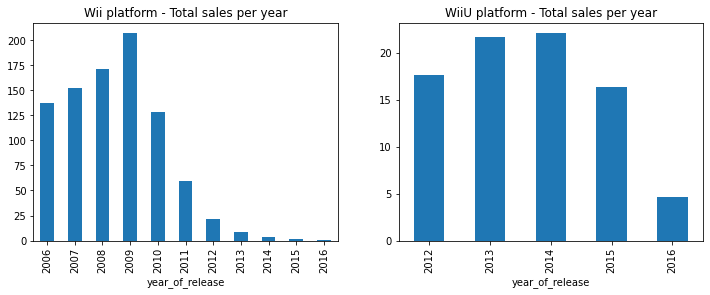

In [55]:
# Ventas por año de consolas Wii y WiiU
plt.subplots(figsize=(12, 4)) 
df.query('platform=="Wii"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar'
                                                                    ,ax=plt.subplot(1,2, 1)) 
plt.title('Wii platform - Total sales per year') 
df.query('platform == "WiiU"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar'
                                                                   ,ax=plt.subplot(1, 2, 2)) 
plt.title('WiiU platform - Total sales per year') 
plt.show() 

**Los juegos lanzados cuatro años después del debut de la Wii tuvieron los mayores ingresos. Sin embargo, en 2012, hubo un declive significativo, posiblemente debido al lanzamiento de la WiiU. A pesar de los buenos ingresos de la WiiU, no superan a los de la Wii original.**

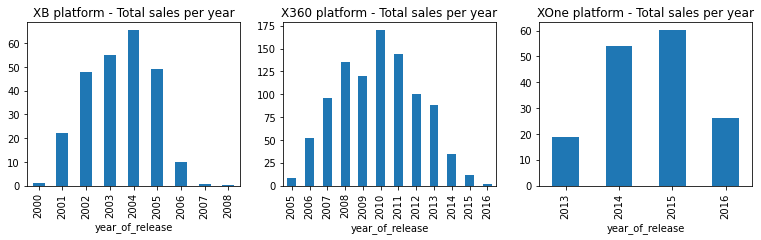

In [56]:
# Ventas por año de consolas X360,XB y XOne
plt.subplots(figsize=(13, 3)) 

for i, console in enumerate(["XB","X360","XOne"]): 
    df.query('platform == @console').groupby('year_of_release')['total_sales'].sum().plot(kind='bar',
                                                            ax=plt.subplot(1,3, i + 1))
    plt.title(console + " platform - Total sales per year")
plt.show()

**La XB evidencia que nuevas plataformas emergen cada 6 años, dado que sus ventas disminuyen significativamente a ese punto. Su pico de ventas fue en 2004. En contraste, la X360 tuvo sus mayores ingresos con juegos de 2010 y 2011, y continuó mostrando ventas robustas casi una década después de su lanzamiento, especialmente en 2014 y 2015.**

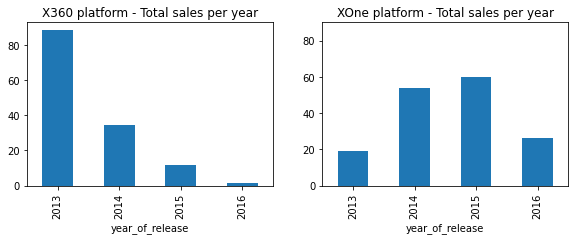

In [57]:
# Ventas por año de consolas X360 y XOne
plt.subplots(figsize=(15, 3)) 

for i, console in enumerate(["X360","XOne"]): 
    df.query('platform == @console and year_of_release >=2013'
        ).groupby('year_of_release')['total_sales'].sum().plot(kind='bar',ax=plt.subplot(1,3, i + 1))
    plt.title(console + " platform - Total sales per year")
    
plt.ylim(0, 90) 
plt.show()

**Al comparar los años donde X360 y XOne han estado presentes, la X360 superá los ingresos de la X360 en los juegos lanzados en 2013; en los juegos lanzados los años siguientes la XOne sube sus ingresos pero no se acerca a los ingresos de la X360 en sus mejores años.**

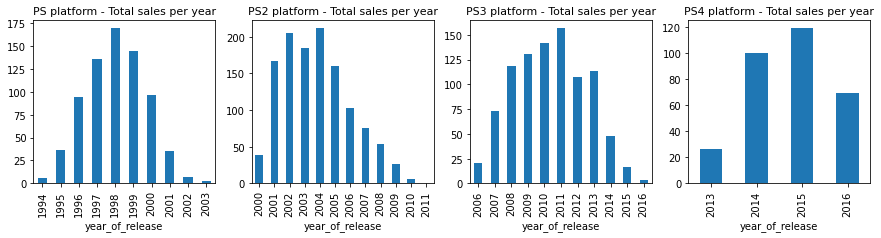

In [58]:
# Ventas por año de consolas PS, PS2, PS3 y PS4
plt.subplots(figsize=(15, 3)) 

for i, console in enumerate(["PS", "PS2", "PS3", "PS4"]): 
    df.query('platform == @console').groupby('year_of_release')['total_sales'].sum().plot(kind='bar'
                                                                        ,ax=plt.subplot(1,4, i + 1))
    plt.title(console + " platform - Total sales per year",fontsize = 11)

plt.show()

**Al observar los ingresos de los juegos de la serie PS, se detecta que la llegada de una nueva plataforma disminuye los ingresos de la anterior. A diferencia de otras series, las plataformas PS mantienen ingresos consistentes y comparables entre sí, mientras que en otras series, las versiones más recientes no igualan a sus predecesoras.**

In [59]:
# Se investigan las plataformas que tienen menos de 6 años o menos de lanzamiento
print('Platforms were the first game released was in 2010 or after:')
for plat in ['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG','N64', 'NES', 'NG', 'PC', 'PCFX','PS'
        ,'PS2', 'PS3', 'PS4', 'PSP','PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360','XB', 'XOne']:
    if df.query('platform == @plat')['year_of_release'].min() >=2010:
        print (plat, '- First game released in',df.query('platform == @plat')['year_of_release'].min())

Platforms were the first game released was in 2010 or after:
3DS - First game released in 2011
PS4 - First game released in 2013
PSV - First game released in 2011
WiiU - First game released in 2012
XOne - First game released in 2013


**A partir del análisis, se deduce que desde 1994 los ingresos se han estabilizado, descartando años anteriores. Además, el mercado tiende a renovarse cada 6 años con la entrada de nuevas plataformas, haciéndose menos relevante considerar juegos con más de 6 años de antigüedad. Por ello, para el modelo de 2017, solo se consideran juegos lanzados desde 2011 en adelante.**

In [60]:
df_recent_data = df.query('year_of_release >= 2011')

### Relación entre ventas y reseñas

#### Relación entre ventas y reseñas de todas las plataformas

**Se analiza cómo las reseñas de usuarios y profesionales afectan las ventas en general.**

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


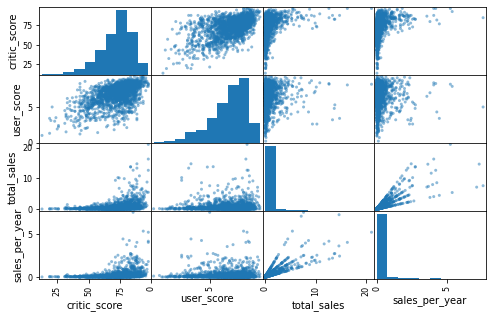

In [61]:
# Matriz de dispersión
df_no_tbd = df_recent_data.query('user_score!="tbd" ')
df_no_tbd.loc[:, 'user_score'] = df_no_tbd['user_score'].astype('float')
scat_matrix = pd.plotting.scatter_matrix(df_no_tbd.loc[:,['critic_score','user_score','total_sales','sales_per_year']]
            , figsize=(8, 5))

In [62]:
# Matriz de correlación sin user_score
df_recent_data.loc[:,['critic_score','total_sales','sales_per_year']].corr()

,critic_score,total_sales,sales_per_year
critic_score,1.000000,0.329977,0.313688
total_sales,0.329977,1.000000,0.835448
sales_per_year,0.313688,0.835448,1.000000


In [63]:
# Matriz de correlación con user_score
df_no_tbd.loc[:,['user_score','total_sales','sales_per_year']].corr()

,user_score,total_sales,sales_per_year
user_score,1.000000,0.031636,0.008173
total_sales,0.031636,1.000000,0.834297
sales_per_year,0.008173,0.834297,1.000000


**La información anterior muestra que:**

- **La columna critic_score tiene una ligera relación positiva con la columna total_sales.**
- **La columna user_score no muestra una relación con las ventas; sin embargo, esta columna tenía un 39.52% de valores ausentes por lo que este resultado no se puede generalizar.**
- **Para confirmar o rechazar la correlación entre la columna critic_score y total_sales se hace una prueba de coeficiente de correlación de Pearson y se obtiene el valor p.**

**Hipotesis nula: no hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos.**

**Hipótesis alterna: si hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos.**

**alpha = 5%**

In [65]:
# Cálculo de correlación y significancia
r, p = st.pearsonr(df_no_tbd.query('critic_score.isna() == False')['critic_score'], df_no_tbd.query(
                                    'critic_score.isna() == False')['total_sales'])
r = round(r,3)
print(f"Correlación Pearson: coeficiente = {r}, p-value ={p}")

alpha=0.05
if p < alpha: print("Se rechaza la hipótesis nula") 
else: print("No se rechaza la hipótesis nula")  

Correlación Pearson: coeficiente = 0.327, p-value =2.7692755119732006e-45
Se rechaza la hipótesis nula


**El análisis anterior muestra que no hay evidencias de que las columnas critic_score y total_sales no esten relacionadas.**

#### Relación entre ventas y reseñas de la plataforma X360

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


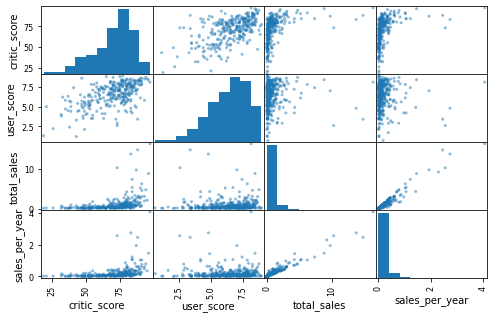

In [66]:
df_rd_x360 = df_recent_data.query('platform == "X360" and user_score!="tbd"')

# Matriz de dispersión
df_rd_x360.loc[:, 'user_score'] = df_rd_x360['user_score'].astype('float')
scat_matrix = pd.plotting.scatter_matrix(df_rd_x360.loc[:,['critic_score','user_score','total_sales','sales_per_year']]
            , figsize=(8, 5))

In [67]:
# Matriz de correlación de plataforma X360
df_rd_x360.loc[:,['critic_score','user_score','total_sales','sales_per_year']].corr()

,critic_score,user_score,total_sales,sales_per_year
critic_score,1.000000,0.568386,0.390005,0.373616
user_score,0.568386,1.000000,0.038918,-0.015324
total_sales,0.390005,0.038918,1.000000,0.968355
sales_per_year,0.373616,-0.015324,0.968355,1.000000


**Para confirmar o rechazar la correlación entre la columna critic_score y total_sales, de la plataforma X360, se hace una prueba de coeficiente de correlación de Pearson y se obtiene el valor p.**

**Hipotesis nula: no hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos.**

**Hipótesis alterna: si hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos.**

**alpha = 5%**

In [68]:
# Cálculo de correlación y significancia
r, p = st.pearsonr(df_rd_x360.query('critic_score.isna() == False')['critic_score'], df_rd_x360.query(
                                    'critic_score.isna() == False')['total_sales'])
r = round(r,3)
print(f"Correlación Pearson: coeficiente = {r}, p-value ={p}")

alpha=0.05
if p < alpha: print("Se rechaza la hipótesis nula") 
else: print("No se rechaza la hipótesis nula") 

Correlación Pearson: coeficiente = 0.39, p-value =4.054585646673898e-12
Se rechaza la hipótesis nula


**El análisis anterior muestra que no hay evidencias de que las columnas critic_score y total_sales no esten relacionadas en cuanto a los ingresos de la plataforma X360.**

#### Relación entre ventas y reseñas de la plataforma PS4

**Se analiza cómo las reseñas de usuarios y profesionales afectan las ventas de la plataforma PS4.**

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


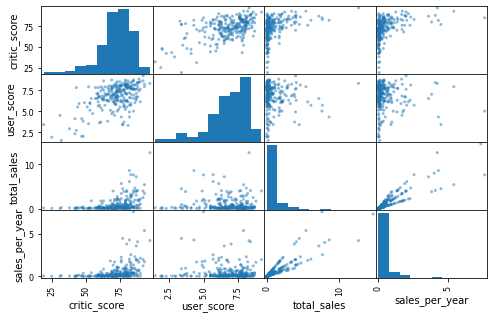

In [69]:
df_rd_ps4 = df_recent_data.query('platform == "PS4" and user_score!="tbd"')

# Matriz de dispersión
df_rd_ps4.loc[:, 'user_score'] = df_rd_ps4['user_score'] .astype('float')
scat_matrix = pd.plotting.scatter_matrix(df_rd_ps4.loc[:,['critic_score','user_score','total_sales','sales_per_year']]
            , figsize=(8, 5))

In [70]:
# Matriz de correlación de plataforma PS4
df_rd_ps4.loc[:,['critic_score','user_score','total_sales','sales_per_year']].corr()

,critic_score,user_score,total_sales,sales_per_year
critic_score,1.000000,0.557654,0.406469,0.387845
user_score,0.557654,1.000000,-0.031957,-0.039419
total_sales,0.406469,-0.031957,1.000000,0.893522
sales_per_year,0.387845,-0.039419,0.893522,1.000000


**Para confirmar o rechazar la correlación entre la columna critic_score y total_sales, de la plataforma PS4, se hace una prueba de coeficiente de correlación de Pearson y se obtiene el valor p.**

**Hipotesis nula: no hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos.**

**Hipótesis alterna: si hay correlación entre las calificaciones de los críticos y las ventas totales de los juegos.**

**alpha = 5%**

In [71]:
# Cálculo de correlación y significancia
r, p = st.pearsonr(df_rd_ps4.query('critic_score.isna() == False')['critic_score'], df_rd_ps4.query(
                                    'critic_score.isna() == False')['total_sales'])
r = round(r,3)
print(f"Correlación Pearson: coeficiente = {r}, p-value ={p}")

alpha=0.05
if p < alpha: print("Se rechaza la hipótesis nula") 
else: print("No se rechaza la hipótesis nula")  

Correlación Pearson: coeficiente = 0.406, p-value =2.3015406728057746e-11
Se rechaza la hipótesis nula


**El análisis anterior muestra que no hay evidencias de que las columnas critic_score y total_sales no esten relacionadas en cuanto a los ingresos de la plataforma PS4.**

**Tomando en cuenta los datos de todas las plataformas y especificamente los de X360 y PS4, se obtuvo que en todos los casos las calificaciones de los usuarios no afectan los ingresos totales pero las de los profesionales si.**

#### Ventas del mismo juego en distintas plataformas

**Se analizan las ventas del mismo juego en distintas plataformas.**

In [72]:
# Vista previa de los juegos de la plataforma X360
df_rd_x360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,4.07
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73,2.46
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68,2.74
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,2.56
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71,1.94


In [73]:
# Vista previa de los juegos de la plataforma ps4
df_rd_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63,7.32
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4.21
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,4.29
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98,3.99
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,2.55


In [74]:
# Buscar juegos similares entre las plataformas
df_rd_x360[df_rd_x360.name.str.contains('Call of Duty')]['name'].value_counts()

Call of Duty: Black Ops II        1
Call of Duty: Black Ops 3         1
Call of Duty: Ghosts              1
Call of Duty: Advanced Warfare    1
Call of Duty: Modern Warfare 3    1
Name: name, dtype: int64

In [75]:
df_rd_ps4[df_rd_ps4.name.str.contains('Call of Duty')]['name'].value_counts()

Call of Duty: Infinite Warfare    1
Call of Duty: Advanced Warfare    1
Call of Duty: Black Ops 3         1
Call of Duty: Ghosts              1
Name: name, dtype: int64

**Se detectaron dos juegos iguales que se usan en ambas plataformas:**

- **Call of Duty: Advanced Warfare**
- **Call of Duty: Ghosts**

In [76]:
# Vista previa de juego "Call of Duty: Advanced Warfare"
df_recent_data.query('name == "Call of Duty: Advanced Warfare"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,2.55
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26,1.75
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36,1.45
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28,1.43
4736,Call of Duty: Advanced Warfare,PC,2014,Shooter,0.15,0.23,0.00,0.03,78.0,4.5,M,0.41,0.14


In [77]:
# Vista previa de juego "Call of Duty: Ghosts"
df_recent_data.query('name == "Call of Duty: Ghosts"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_per_year
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,2.56
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,2.34
323,Call of Duty: Ghosts,PS4,2013,Shooter,1.78,1.43,0.05,0.57,78.0,3.7,M,3.83,0.96
493,Call of Duty: Ghosts,XOne,2013,Shooter,1.88,0.77,0.00,0.27,78.0,4.3,M,2.92,0.73
2916,Call of Duty: Ghosts,PC,2013,Shooter,0.23,0.41,0.00,0.05,NaN,NaN,RP,0.69,0.17
5348,Call of Duty: Ghosts,WiiU,2013,Shooter,0.22,0.09,0.01,0.03,69.0,3.4,M,0.35,0.09


**Tomando como referencia el juego Call of Duty: Advanced Warfare, lanzado en el 2014, las calificaciones de los profesionales más altas las tienen las plataformas PS4 y XOne; asimismo, estas son las que tienen los más altos ingresos historicos y anuales.**

**Por el contrario, tomando como referencia el juego Call of Duty: Ghosts, lanzado en el 2013, las calificaciones de los profesionales más altas pertenecen a las plataformas PS4 y XOne; sin embargo los ingresos historicos y anuales más altos pertenecen a PS3 y X360.**

**Esta diferencia podría deberse a que la plataforma X360 se lanzó en el 2005 y la XOne en el 2013. A pesar de no tener una calificación significativamente alta, ha tendio más tiempo en el mercado por lo que ha tenido más tiempo para acumular ingresos totales. Cosa que podría suceder también con las plataformas PS3 y PS4.**

#### Ventas por género

**Se examina la distribución general de las ventas de juegos por género.**

In [78]:
# Cantidad de juegos por categoría (datos recientes)
df_recent_data['genre'].value_counts().sort_values(ascending=False)

Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         117
Puzzle            71
Name: genre, dtype: int64

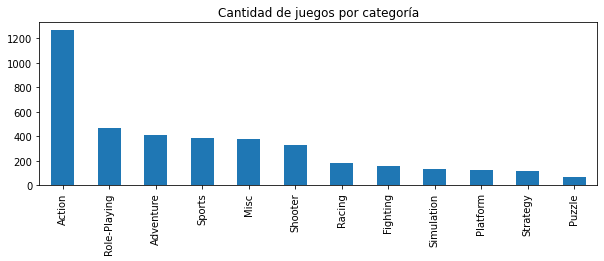

In [79]:
# Cantidad de juegos por categoría (datos recientes)
df_recent_data['genre'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(10,3),
                                                                         title="Cantidad de juegos por categoría")
plt.show()

In [80]:
# Ingresos históricos por categoría por año
df_recent_data.groupby('genre')['sales_per_year'].sum().sort_values(ascending=False)

genre
Action          172.31
Shooter         139.89
Sports           84.71
Role-Playing     81.37
Misc             36.03
Racing           24.05
Platform         23.68
Fighting         21.06
Adventure        14.74
Simulation       13.91
Strategy          5.97
Puzzle            2.22
Name: sales_per_year, dtype: float64

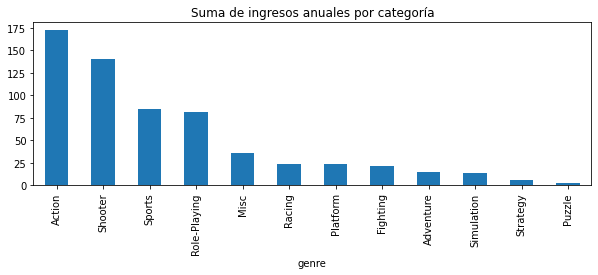

In [81]:
# Ingresos históricos por categoría por año
df_recent_data.groupby('genre')['sales_per_year'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,3),
                                                             title="Suma de ingresos anuales por categoría")
plt.show()

In [82]:
# Promedio de ingresos por año
df_recent_data.groupby('genre')['sales_per_year'].mean().sort_values(ascending=False)

genre
Shooter         0.425198
Sports          0.217763
Platform        0.194098
Role-Playing    0.174989
Action          0.135784
Racing          0.133611
Fighting        0.132453
Simulation      0.102279
Misc            0.096080
Strategy        0.051026
Adventure       0.035951
Puzzle          0.031268
Name: sales_per_year, dtype: float64

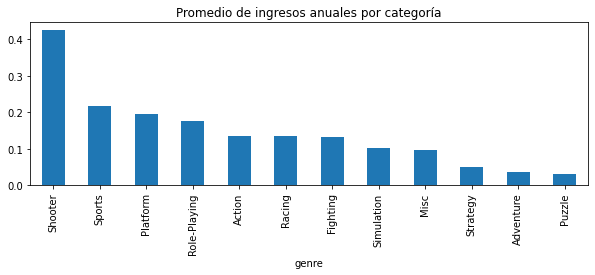

In [83]:
# Promedio de ingresos por año
df_recent_data.groupby('genre')['sales_per_year'].mean().sort_values(ascending=False).plot(
    kind='bar',figsize=(10,3),title="Promedio de ingresos anuales por categoría")
plt.show()

In [84]:
# Ingresos anuales máximos de cada categoría
df_recent_data.groupby('genre')['sales_per_year'].max().sort_values(ascending=False)

genre
Sports          7.60
Shooter         7.32
Role-Playing    7.14
Action          5.26
Fighting        2.52
Racing          2.36
Misc            2.30
Platform        1.98
Simulation      1.83
Adventure       0.94
Strategy        0.42
Puzzle          0.40
Name: sales_per_year, dtype: float64

**Históricamente, el género de acción lidera en cantidad y en ingresos anuales. Sin embargo, en ingreso promedio, los juegos de tiro superan por más del doble a los de acción, a pesar de contar con la mitad de títulos. Deportes, tiro y rol encabezan los ingresos anuales máximos, seguidos de acción. Por otro lado, rompecabezas, aventura y estrategia reportan los ingresos más bajos tanto históricamente como en promedios anuales.**

#### Ventas por clasificación

**Se examina la distribución general de las ventas de juegos por su clasificación ESRB.**

**La columna rating cuenta con los siquientes valores:**

- **E (todos).**
- **EC (mayores de 3 años).**
- **E10+ (mayores de 10 años).**
- **K-A (mayores de 10 años) dejó de usarse en 1998 y se reemplazó con E10+.**
- **T (mayores de 13 años).**
- **M (mayores de 17 años).**
- **AO (sólo para adultos de 18 años en adelante).**
- **RP (pendiente de clasificar).**

In [85]:
# Cantidad de juegos por clasificación (datos recientes)
df_recent_data['rating'].value_counts().sort_values(ascending=False)

RP      1709
M        622
E        618
T        616
E10+     456
EC         1
Name: rating, dtype: int64

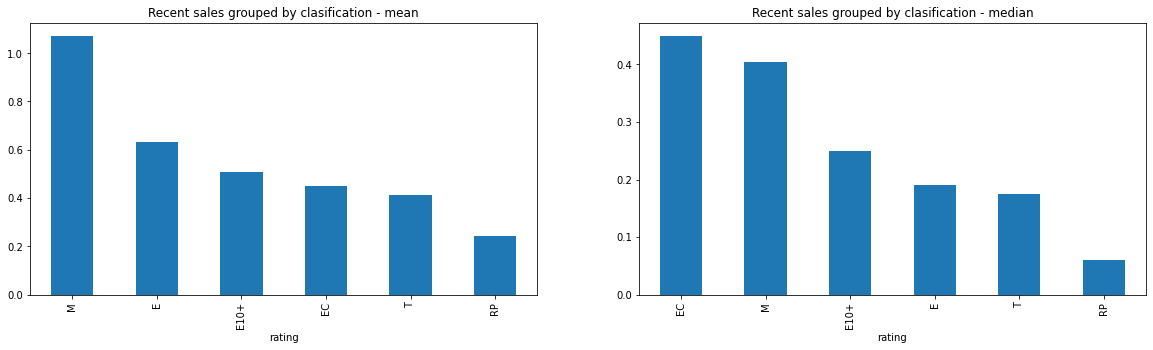

In [86]:
# Ingresos recientes de juegos por año clasificación
plt.subplots(figsize=(20, 5)) 
df_recent_data.groupby('rating')['total_sales'].mean().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,1))
plt.title('Recent sales grouped by clasification - mean')

df_recent_data.groupby('rating')['total_sales'].median().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,2))
plt.title('Recent sales grouped by clasification - median')

plt.show()

**En los últimos años, en promedio la categoría con mayores ingresos es la de M (mayores de 17 años), seguida por la E (todos).**

**Sin embargo, al ver las medianas, la de mayor es EC (mayores de 3 años) seguida por M.**

### Perfil de usuario por región

**A continuación, se analizan las diferencias entre regiones determinando:**

- **Las cinco plataformas principales por región.**
- **Los cinco géneros principales.**
- **Las ventas en base a las clasificaciones de ESRB.**
- **Las variaciones en sus cuotas de mercado de una región a otra.**

#### Región NA (Norteamérica)

**Se buscan las cinco plataformas principales de la región NA.**

##### Plataformas Principales

In [87]:
# Plataformas principales - suma de ingresos historicos
print('5 Plataformas principales, de años recientes, con mayor suma de ingresos históricos:')
df_recent_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

5 Plataformas principales, de años recientes, con mayor suma de ingresos históricos:


platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

In [88]:
for plat in ['X360','PS3','PS4','XOne','3DS']:
    print('year of release of the first game released in the platform',plat,':'
          ,df.query('platform == @plat')['year_of_release'].min())

year of release of the first game released in the platform X360 : 2005
year of release of the first game released in the platform PS3 : 2006
year of release of the first game released in the platform PS4 : 2013
year of release of the first game released in the platform XOne : 2013
year of release of the first game released in the platform 3DS : 2011


**La plataforma X360 lidera en ingresos recientes y es la más antigua en el mercado. La suma de ingresos suele corresponder con el año de lanzamiento de cada plataforma, con la única excepción de la 3DS.**

##### Géneros Principales

**Se buscan los cinco géneros principales de la región NA.**

In [93]:
# Plataformas principales - suma de ingresos historicos
print('5 plataformas principales, de años recientes, con mayor suma de ingresos históricos:')
df_recent_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

5 plataformas principales, de años recientes, con mayor suma de ingresos históricos:


platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

In [91]:
# Géneros principales - promedio de ingresos historicos
print('5 géneros principales, de años recientes, con mayor promedio de ingresos históricos:')
df_recent_data.groupby('genre')['na_sales'].mean().sort_values(ascending=False).head(5)

5 géneros principales, de años recientes, con mayor promedio de ingresos históricos:


genre
Shooter     0.590973
Platform    0.313770
Sports      0.279434
Fighting    0.198931
Misc        0.185840
Name: na_sales, dtype: float64

**Al igual que las ventas por género globales, el género principal de la región NA es Shooter. También coinciden los generos platform y Sports en los primeros 5 pero en distinto orden.**

##### Ventas en base a la clasificacion ESRB

**Se analiza si las clasificaciones ESRB afectan las ventas de la region NA.**

**Al igual que en el análisis de clasificación ESRB global, no se toma en cuenta la clasificación AO ni K-A.**

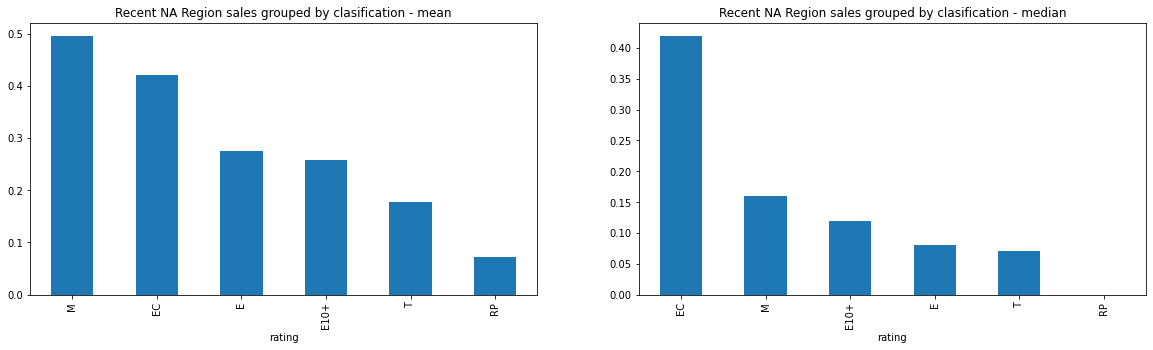

In [94]:
# Ingresos recientes de juegos por año clasificación sin AO ni K-A
plt.subplots(figsize=(20, 5)) 
df_recent_data.groupby('rating')['na_sales'].mean().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,1))
plt.title('Recent NA Region sales grouped by clasification - mean')

df_recent_data.groupby('rating')['na_sales'].median().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,2))
plt.title('Recent NA Region sales grouped by clasification - median')

plt.show()

**En sintonía con el análisis global, la clasificación M (mayores de 17 años) tiene el mayor ingreso promedio, mientras que EC (mayores de 3 años) presenta la mediana más alta. Las demás medianas no varían significativamente, excepto por RP que es 0.**

#### Región EU (Europa)

##### Plataformas Principales

**Se buscan las cinco plataformas principales de la región EU.**

In [95]:
# Plataformas principales - suma de ingresos historicos
print('5 Plataformas principales, de años recientes, con mayor suma de ingresos históricos:')
df_recent_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

5 Plataformas principales, de años recientes, con mayor suma de ingresos históricos:


platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64

In [96]:
for plat in ['PS3','PS4','X360','3DS','PC']:
    print('year of release of the first game released in the platform',plat,':'
          ,df.query('platform == @plat')['year_of_release'].min())

year of release of the first game released in the platform PS3 : 2006
year of release of the first game released in the platform PS4 : 2013
year of release of the first game released in the platform X360 : 2005
year of release of the first game released in the platform 3DS : 2011
year of release of the first game released in the platform PC : 1985


**En esta región, PS3 y PS4 lideran en ingresos, pero la PS4, siendo más reciente, podría superar a la PS3 en el futuro.**

**Sorprendentemente, los juegos de PC están entre los cinco primeros. Aunque esta plataforma se originó en 1985, su diversidad y actualizaciones constantes la mantienen relevante.**

##### Géneros Principales

**Se buscan los cinco géneros principales de la región EU.**

In [97]:
# Géneros principales - promedio de ingresos historicos
print('5 géneros principales, de años recientes, con mayor promedio de ingresos históricos:')
df_recent_data.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).head(5)

5 géneros principales, de años recientes, con mayor promedio de ingresos históricos:


genre
Shooter     0.449909
Platform    0.246475
Sports      0.227455
Racing      0.225444
Action      0.156911
Name: eu_sales, dtype: float64

**El género dominante en esta región es "Shooter". Los géneros que coinciden con el análisis global son "Platform", "Sports" y "Action". Aunque "Racing" no está entre los primeros cinco a nivel global, ocupa el sexto lugar.**

##### Ventas en base a la clasificacion ESRB

**Se analiza si las clasificaciones ESRB afectan las ventas de la region EU.**

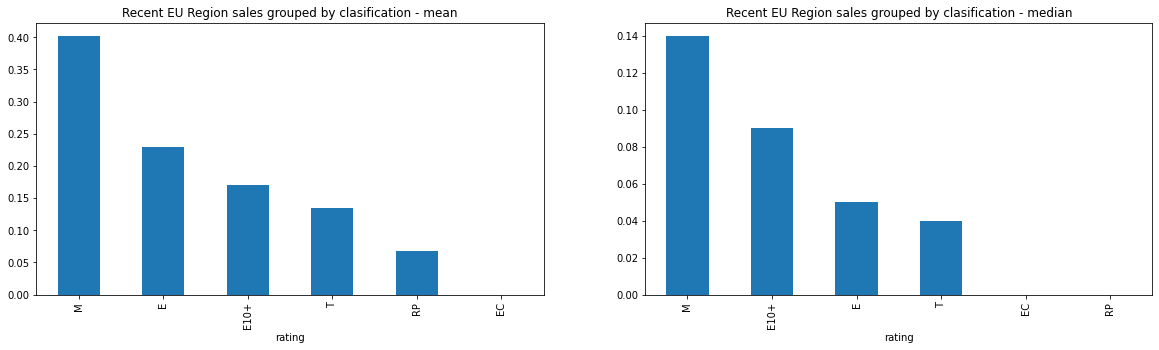

In [98]:
# Ingresos recientes de juegos por año clasificación sin AO ni K-A
plt.subplots(figsize=(20, 5)) 
df_recent_data.groupby('rating')['eu_sales'].mean().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,1))
plt.title('Recent EU Region sales grouped by clasification - mean')

df_recent_data.groupby('rating')['eu_sales'].median().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,2))
plt.title('Recent EU Region sales grouped by clasification - median')

plt.show()

**Al igual que en el análisis global, en promedio la clasificación M (mayores de 17 años) es la de mayor ingresos.**

**Asimismo, la mediana mayor es la de la clasificación M. El resto de las clasificaciones muestran una diferencia significativa con la clasificación de mayor ingreso.**

#### Región JP (Japón)

##### Plataformas Principales

**Se buscan las cinco plataformas principales de la región JP.**

In [99]:
# Plataformas principales - promedio de ingresos historicos
print('5 Plataformas principales, de años recientes, con mayor promedio de ingresos históricos:')
df_recent_data.groupby('platform')['jp_sales'].mean().sort_values(ascending=False).head(5)

5 Plataformas principales, de años recientes, con mayor promedio de ingresos históricos:


platform
3DS     0.196523
WiiU    0.088503
PSP     0.077051
PS3     0.069760
PSV     0.050909
Name: jp_sales, dtype: float64

In [100]:
# Plataformas principales - suma de ingresos historicos
print('5 Plataformas principales, de años recientes, con mayor suma de ingresos históricos:')
df_recent_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

5 Plataformas principales, de años recientes, con mayor suma de ingresos históricos:


platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64

**Al analizar las plataformas principales de la región JP se observa que las principales, con la suma de ingresos mayores, pertenecen a la familia de Sony (PSs) a excepción de la 3DS.**

##### Géneros Principales

**Se buscan los cinco géneros principales de la región JP.**

In [101]:
# Géneros principales - promedio de ingresos historicos
print('5 géneros principales, de años recientes, con mayor promedio de ingresos históricos:')
df_recent_data.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).head(5)

5 géneros principales, de años recientes, con mayor promedio de ingresos históricos:


genre
Role-Playing    0.171763
Platform        0.099426
Simulation      0.085588
Fighting        0.077862
Action          0.050134
Name: jp_sales, dtype: float64

In [102]:
# Géneros principales - promedio de ingresos historicos
print('géneros de años recientes, con menor promedio de ingresos históricos:')
df_recent_data.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).tail(4)

géneros de años recientes, con menor promedio de ingresos históricos:


genre
Shooter      0.036231
Racing       0.031333
Adventure    0.029439
Sports       0.028509
Name: jp_sales, dtype: float64

**A diferencia de las otras dos regiones, en Jápón el género principal es Role-Playing y el género Shooter esta entre los últimos. Los principales géneros de esta región que coinciden con los globales son el ya mencionado Role-Playing, Action y Platform.**

##### Ventas en base a la clasificacion ESRB

**Se analiza si las clasificaciones ESRB afectan las ventas de la region JP.**

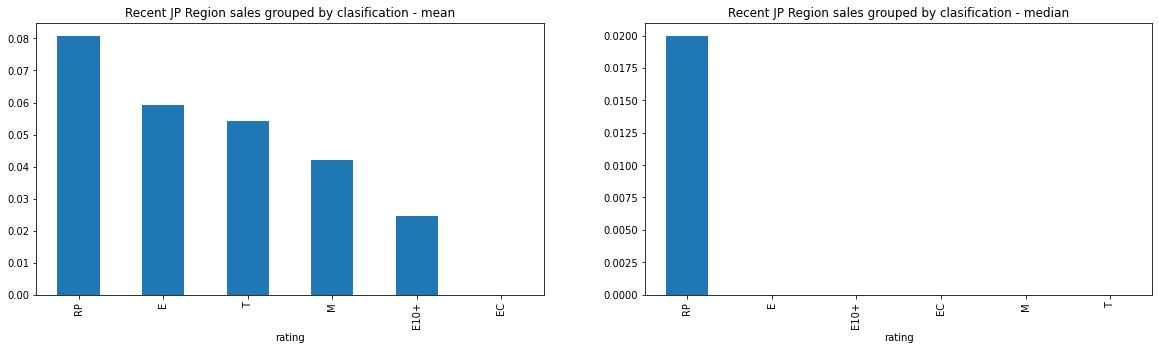

In [103]:
# Ingresos recientes de juegos por año clasificación sin AO ni K-A
plt.subplots(figsize=(20, 5)) 
df_recent_data.groupby('rating')['jp_sales'].mean().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,1))
plt.title('Recent JP Region sales grouped by clasification - mean')

df_recent_data.groupby('rating')['jp_sales'].median().sort_values(ascending=False).plot(
    kind='bar', ax= plt.subplot(1,2,2))
plt.title('Recent JP Region sales grouped by clasification - median')

plt.show()

**A diferencia de las otras regiones, la clasificación principal de Japón es RP (pendiente de clasificar).**

**Asimismo, al evaluar las medianas todas se ubican en ceros a excepción de RP.**

### Cuota de mercado entre regiónes

In [104]:
# Plataformas principales recientes
df_recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(3)

platform
PS3     445.57
X360    380.38
PS4     314.14
Name: total_sales, dtype: float64

**Las plataformas principales con mayor suma de ingresos históricos son:**

- **PS3**
- **X360**
- **PS4**

**La plataforma x360, que esta entre las plataformas más rentables, esta entre las principales de las regiones NA y EU pero no de JP.**

In [105]:
# Ingresos totales recientes
total_income = df_recent_data['total_sales'].sum()

# Ingresos por plataforma de los últimos 10 años
df_recent_data_ps3 = df_recent_data.query('platform == "PS3"')
df_recent_data_x360 = df_recent_data.query('platform == "X360"')
df_recent_data_ps4 = df_recent_data.query('platform == "PS4"')

# Variaciones en sus cuotas de mercado de una región a otra de plataforma PS3
print('Variación en cuota de mercado entre regiónes de la plataforma PS3')
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(region,  round(df_recent_data_ps3[region].sum() /total_income*100,3)  ,'%')

Variación en cuota de mercado entre regiónes de la plataforma PS3
na_sales 8.611 %
eu_sales 8.347 %
jp_sales 2.527 %


In [106]:
# Variaciones en sus cuotas de mercado de una región a otra de plataforma X360
print('Variación en cuota de mercado entre regiónes de la plataforma X360')
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(region,  round(df_recent_data_x360[region].sum() /total_income*100,3)  ,'%')

Variación en cuota de mercado entre regiónes de la plataforma X360
na_sales 11.606 %
eu_sales 5.992 %
jp_sales 0.171 %


In [107]:
# Variaciones en sus cuotas de mercado de una región a otra de plataforma PS4
print('Variación en cuota de mercado entre regiónes de la plataforma PS4')
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(region,  round(df_recent_data_ps4[region].sum() /total_income*100,3)  ,'%')

Variación en cuota de mercado entre regiónes de la plataforma PS4
na_sales 5.565 %
eu_sales 7.22 %
jp_sales 0.817 %


**Al analizar las cuotas de mercado de las plataformas principales por region se observa que:**

- **En general, la región NA tiene las cuotas más altas, seguida de la región EU, dejando al final a la JP.**
- **La cuota más alta es de los ingresos de la región NA con la plataforma X360.**
- **La cuota más baja es de los ingresos de la región JP con la plataforma X360.**

**Cabe mencionar que las plataformas principales de la región JP son las PSs y aún asi, estas tienen cuotas bajas en está región.**

## Pruebas de hipótesis

**A continuación se prueban las siguientes hipótesis:**

- **Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas.**
- **Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son diferentes.**

### Hipótesis de calificaciones promedio para Xbox One y PC

**Se corrobora que la distribucion de ambas muestras sea normal.**

**Hipótesis nula: Los datos siguen una distribución normal.**

**Hipótesis alterna: Los datos no siguen una distribución normal.**

**Se establece el umbral alfa en 5%**

In [108]:
# Comprobación de distribución normal
user_score_xo = df_recent_data.query(
'platform == "XOne" and user_score != "tbd" and user_score.isna() == False'
                                                                    )['user_score'].astype('float')
user_score_pc = df_recent_data.query(
    'platform == "PC" and user_score != "tbd" and user_score.isna() == False'
                                                                    )['user_score'].astype('float')

alpha = 0.05 # nivel de significancia estadística crítica

# Normalidad de los residuos Shapiro-Wilk test Xone
shapiro_test = st.shapiro(user_score_xo)
print('Variable user_score de plataforma XOne:')
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

# Normalidad de los residuos Shapiro-Wilk test PC
shapiro_test = st.shapiro(user_score_pc)
print('Variable user_score de plataforma PC:')
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")

Variable user_score de plataforma XOne:
ShapiroResult(statistic=0.955055296421051, pvalue=1.524856543255737e-05)
Se rechaza la hipótesis nula

Variable user_score de plataforma PC:
ShapiroResult(statistic=0.9421188235282898, pvalue=1.3285270661356208e-09)
Se rechaza la hipótesis nula


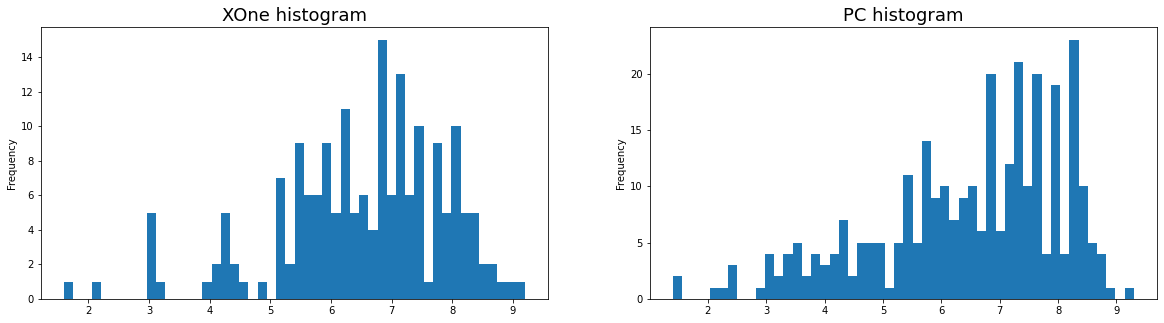

In [109]:
# Graficar datos
plt.subplots(figsize=(20, 5)) 
user_score_xo.plot(kind='hist', ax= plt.subplot(1,2,1),bins=50)
plt.title('XOne histogram',fontsize = 18)

user_score_pc.plot(kind='hist', ax= plt.subplot(1,2,2),bins=50)
plt.title('PC histogram',fontsize = 18)
plt.show()

**Hay evidencias para descartar que los datos de ambas variables se distribuyen de forma normal; dado que la distribución no se aleja mucho de la normalidad, se continua el análisis tomando en cuenta este hecho.**

In [110]:
# Varianza de las muestras - prueba de levene
levene_test = st.levene (user_score_xo, user_score_pc, center = 'median') 
print('Prueba de varianzas iguales:')
print(levene_test)

if levene_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

Prueba de varianzas iguales:
LeveneResult(statistic=5.516327585628806, pvalue=0.019238606822499546)
Se rechaza la hipótesis nula



**Se continua con la prueba de hipótesis aplicando un T-test de varianzas distintas.**

**Hipótesis nula: Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son iguales.**

**Hipótesis alternativa: Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son diferentes.**

**Se establece el umbral alfa en 5%**

In [111]:
# Si el valor p es menor que alfa, se rechaza la hipótesis
results = st.ttest_ind(user_score_xo, user_score_pc,equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula") 

p-value:  0.6130712247638477
No se rechaza la hipótesis nula


**No se rechaza la hipótesis nula por lo que no se tiene evidencia suficiente para decir que las calificaciones calificaciones promedio de las plataformas Xbox One y PC son diferentes.**

### Hipótesis de calificaciones promedio para los géneros acción y deportes

**Se corrobora que la distribucion de ambas muestras sea normal.**

**Hipótesis nula: Los datos siguen una distribución normal.**

**Hipótesis alterna: Los datos no siguen una distribución normal.**

**Se establece el umbral alfa en 5%**

In [112]:
# Comprobación de distribución normal
user_score_ac = df_recent_data.query(
    'genre == "Action" and user_score != "tbd" and user_score.isna() == False'
                                                                        )['user_score'].astype('float')
user_score_dp = df_recent_data.query(
    'genre == "Sports" and user_score != "tbd" and user_score.isna() == False'
                                                                        )['user_score'].astype('float')

# Normalidad de los residuos Shapiro-Wilk test Xone
shapiro_test = st.shapiro(user_score_ac)
print('Variable user_score del género acción:')
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

# Normalidad de los residuos Shapiro-Wilk test PC
shapiro_test = st.shapiro(user_score_dp)
print('Variable user_score del género deportes:')
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")

Variable user_score del género acción:
ShapiroResult(statistic=0.9310101270675659, pvalue=6.254849286294867e-17)
Se rechaza la hipótesis nula

Variable user_score del género deportes:
ShapiroResult(statistic=0.9578661918640137, pvalue=1.335329216090031e-06)
Se rechaza la hipótesis nula


**No hay evidencias para descartar que los datos de ambas variables se distribuyen de forma normal; se continua el análisis.**

In [113]:
# Varianza de las muestras - prueba de levene
levene_test = st.levene (user_score_ac, user_score_dp, center = 'median') 
print('Prueba de varianzas iguales:')
print(levene_test)

if levene_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

Prueba de varianzas iguales:
LeveneResult(statistic=18.398485636804207, pvalue=1.9840382117903915e-05)
Se rechaza la hipótesis nula



**Se continua con la prueba de hipótesis aplicando un T-test de varianzas distintas.**

**Hipótesis nula: Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son iguales.**

**Hipótesis alternativa: Las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son diferentes.**

**Se establece el umbral alfa en 5%**

In [114]:
# Si el valor p es menor que alfa, se rechaza la hipótesis
results = st.ttest_ind(user_score_ac, user_score_dp,equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula") 

p-value:  8.285648549432565e-19
Se rechaza la hipótesis nula


**No existe evidencia para afirmar que las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son iguales.**

## Conclusión

### Información analizada

**Inicialmente se tenían 16715 filas de datos pero se eliminaron y modificaron ciertas filas.**

- **Las columnas "name" y "genre" tenían menos del 1% de valores faltantes y "year_of_release" un 1.61%. Estas filas se eliminaron debido a su insignificancia.**
- **Las columnas "critic_score" y "user_score" tenían ausencias del 50.62% y 39.52% respectivamente. Debido a su importancia, se mantuvieron intactas.**
- **A las ausencias en la columna "rating" (39.94%), se les asignó el valor RP (Rating Pending).**

**Se crearon columnas adicionales para facilitar el análisis como:**

- **"total_sales" para las ventas totales por juego.**
- **"sales_per_year" para el promedio anual de ventas por juego.**

### Conclusiones globales

**Se identificaron los siguientes patrones para determinar si un juego tiene éxito o no:**

- **Aunque el año de lanzamiento no es crucial, la cantidad de juegos lanzados en un año sí es. Más juegos en el mercado dispersan los ingresos.**

- **A pesar de que nuevas plataformas emergen aproximadamente cada 6 años, las anteriores aún generan ingresos. Las más rentables recientemente incluyen: PS2, X360, PS3, Wii y DS.**

- **Las reseñas profesionales impactan positivamente las ventas, mientras que las opiniones de los usuarios no parecen influir. Dado que hay ausencias del 50.62% y 39.52% en las calificaciones de profesionales y usuarios respectivamente, esta observación no es definitiva.**

- **El género es relevante en los ingresos. El género de acción lidera en número e ingresos históricos, mientras que el género de tiro tiene el promedio de ingresos más alto. Para maximizar ingresos, se beneficiaría de más juegos de tiro anuales.**

- **Los géneros más lucrativos son: tiro, juegos de rol, acción y deportes, mientras que rompecabezas, aventura y estrategia generan menos.**

- **La clasificación M (mayores de 17 años) lidera en ingresos históricos promedio.**

### Conclusiones por región

**Al analizar las 3 regiones se identificaron los siguientes patrones:**

**Región NA (Norteamérica)**

- **Plataformas top: X360, PS3, PS4, XOne, 3DS.**
- **Géneros principales: Shooter, Platform, Sports, Racing, Action.**
- **Clasificación ESRB más rentable: M (mayores de 17 años), aunque EC (mayores de 3 años) tiene la mediana de ingresos más alta. RP tiene una mediana de 0.**


**Región EU (Europa)**

- **Plataformas top: PS3, PS4, X360, 3DS, PC.**
- **Géneros principales: Shooter, Platform, Sports, Racing, Action.**
- **Clasificación ESRB más rentable: M (mayores de 17 años) domina tanto en promedio como en mediana.**


**Región JP (Japón)**

- **Plataformas top: 3DS, WiiU, PSP, PS3, PSV.**
- **Géneros principales: Role-Playing, Platform, Simulation, Fighting, Action. El género Shooter es poco popular aquí.**
- **Clasificación ESRB más rentable: RP (pendiente de clasificar), con la mayoría de las medianas en cero.**


**En resumen, NA y EU tienen patrones similares, mientras que JP se diferencia en plataformas, géneros y clasificaciones ESRB.**